In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import seaborn as sns

import scipy.optimize as opt
import Quandl

from helpers import get_adj_close

import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot
from statsmodels.graphics import tsaplots
from statsmodels.tsa import *

/Users/bbahmany/Main/Programming/Git/quantitative-finance/qf-env/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.edgecolor': '.6', 
                            'axes.facecolor': '0.9', 
                            'grid.color': '.82', 
                            'legend.frameon': True,
                            'axes.labelsize': 'small'})
#sns.set_context("talk")

In [3]:
basket = get_adj_close(['FB', 'AAPL'], start="2013-01-01", ratio=False)

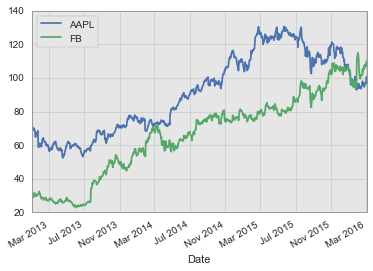

In [4]:
basket.plot()

In [56]:
basket['FB'][-50:].count()

50

In [78]:
def get_lagged_returns(series, weeks=10):
    return series[-weeks*5:].values/series[-((weeks*5)+1):-1].values

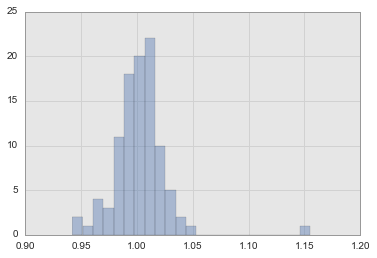

In [76]:
sns.distplot(get_lagged_ratio(basket['FB'],20), kde=False);

In [79]:
# mu = 1
# sigma2 = 1
# x = np.random.lognormal(mu, np.sqrt(sigma2), 5000)

In [27]:
def neg_log_llh(theta, data):
    """Return the negative log-likelihood for the log normal.
    
    Parameters
    ----------
    theta: tuple
        The parameters [mu, sigma**2]
    data: ndarray
        An array of data points that are being modelled by the log normal distribution.
    """
    mu, sigma = theta[0], np.sqrt(theta[1])
    
    neg_log_llhs = np.log(data*sigma*np.sqrt(2*np.pi)) + ((np.log(data)-mu)**2/(2*(sigma**2))) 
    return neg_log_llhs.sum()

In [29]:
def mle(x, init_theta=[1,20]):
    """Return the negative log-likelihood for the log normal.
    
    Parameters
    ----------
    theta: list
        The parameters [mu, sigma**2]
    x: ndarray
        An array of data points that are being modelled by the log normal distribution.
    """
    fit = opt.minimize(neg_log_llh, init_theta, x, method='Nelder-Mead')
    return fit.x

In [64]:
mle((basket.ix[-100:,'FB'].values/basket.ix[-101:-1,'FB'].values))

array([ 0.00173673,  0.00056552])

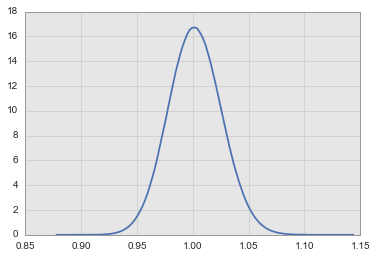

In [67]:
sns.distplot(np.random.lognormal(0.00173673, np.sqrt(0.00056552), 10000000), kde=True, hist=False);

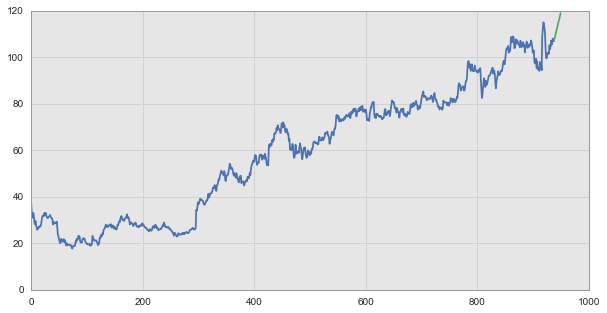

In [44]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,fb.close.count()), fb.close)
plt.plot(np.arange(938, 950), np.cumsum(np.exp(samp))+fb.close[-1])

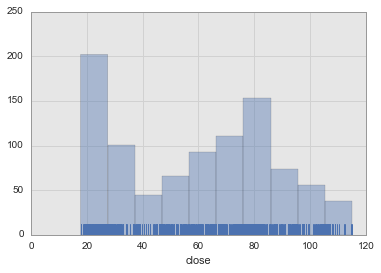

In [16]:
sns.distplot(fb.close, kde=False, rug=True);

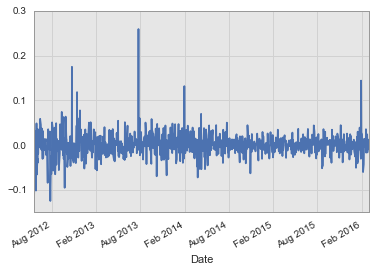

In [6]:
fb.close.map(lambda x:np.log(x)).diff().dropna().plot()

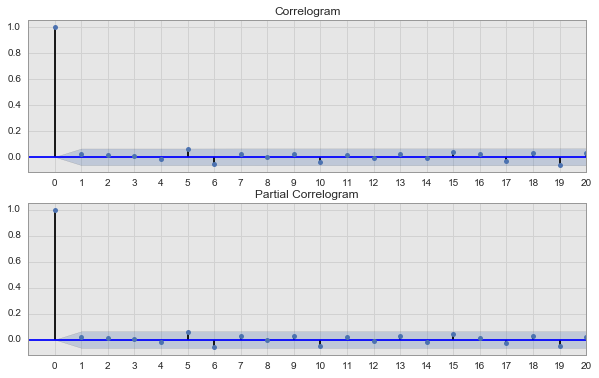

In [7]:
plot_correlograms(fb.close.map(lambda x:np.log(x)).diff().dropna(), 20)

In [ ]:
def plot_correlograms(series, limit=50):
    fig = plt.figure(figsize=(10,6));
    ax1 = fig.add_subplot(211);
    fig = sm.graphics.tsa.plot_acf(series, lags=limit, ax=ax1);
    plt.title('Correlogram');
    plt.xticks(np.arange(0,limit+1,1))
    plt.xlim([-1,limit])
    
    ax2 = fig.add_subplot(212);
    fig = sm.graphics.tsa.plot_pacf(series, lags=limit, ax=ax2);
    plt.title('Partial Correlogram');
    plt.xticks(np.arange(0,limit+1,1))
    plt.xlim([-1,limit])

In [32]:
def moving_average(ts, theta1):
    ma = pd.Series(index=ts.index, data=np.repeat(0, ts.size))
    ma[0] = ts[0]
  
    for idx in range(1,ts.size):
        ma[idx] = theta1*ts[idx-1]
      
    return ma

In [33]:
arima1 = arima_model.ARIMA(fb.close, order=[0,1,1]).fit()

In [34]:
arima1.params

const            0.073164
ma.L1.D.close    0.025695
dtype: float64

In [35]:
resid = arima1.resid

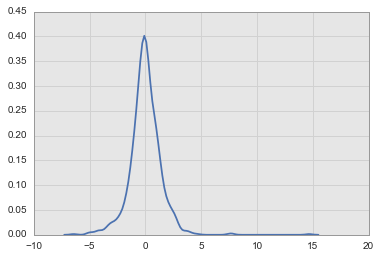

In [41]:
sns.kdeplot(resid);

In [43]:
predict = arima1.predict('2014', '2015', dynamic=True)

/Users/bbahmany/Main/Programming/Git/quantitative-finance/qf-env/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)
